# K-Nearest Neighbors Classifier – Our Baseline Method
    k-Nearest Neighbors (k-NN) is an algorithm, which:
            1. ﬁnds a group of k objects in the training set that are closest to the test object, and
            2. bases the assignment of a label on the predominance of a class in this neighborhood 

In [75]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [76]:
mean1 = np.array([1.0,0.5])
cov1 = np.array([[1.0,0.0],[0.0,1.0]])

dataset1 = np.random.multivariate_normal(mean1,cov1,250)

zeros = np.zeros((dataset1.shape[0],1))
dataset1 = np.hstack((dataset1,zeros))
dataset1.shape

(250, 3)

In [77]:
mean2 = np.array([5.0,6.5])
cov2 = np.array([[1.0,0.0],[0.0,1.0]])

dataset2 = np.random.multivariate_normal(mean2,cov2,250)

ones = np.ones((dataset2.shape[0],1))
dataset2 = np.hstack((dataset2,ones))
dataset2.shape

(250, 3)

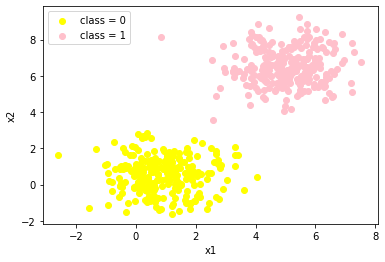

In [78]:
plt.scatter(dataset1[:,0],dataset1[:,1],color = 'yellow',label = 'class = 0')
plt.scatter(dataset2[:,0],dataset2[:,1],color = 'pink',label = 'class = 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [79]:
data = np.vstack((dataset1,dataset2))
np.random.shuffle(data)

spilt = int(0.8*data.shape[0])
x_train,x_test,y_train,y_test = data[:spilt,:-1],data[spilt:,:-1],data[:spilt,-1],data[spilt:,-1]
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 2), (100, 2), (400,), (100,))

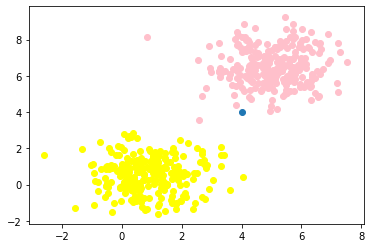

In [80]:
testpts = [4,4]
plt.scatter(dataset1[:,0],dataset1[:,1],color = 'yellow')
plt.scatter(dataset2[:,0],dataset2[:,1],color = 'pink')
plt.scatter(testpts[0],testpts[1])
plt.show()

In [83]:
def euclidean_distance(x1,x2):
    return math.sqrt(((x1-x2)**2).sum())

#returns the distances of nearest k neighbours
def get_prediction(x,X,Y,K_value = 10):
    distance = []
    m = X.shape[0]
    for i in range(m):
        d = euclidean_distance(x,X[i])
        distance.append((d,Y[i]))
    distance.sort()
    distance = distance[:K_value]
    distance = np.array(distance)
    result = np.unique(distance[:,1],return_counts = True)#(array([0., 1.]), array([2, 3], dtype=int64))
    max_index = result[1].argmax()
    ans = result[0][max_index]
    return ans
def get_class(testpts,X,Y):
    class_number = int(get_prediction(testpts,x_train,y_train))
    if(class_number == 1):
        print("({}) point belongs to class 1".format(testpts))
    else:
        print("({}) point belongs to class 0".format(testpts))

In [84]:
get_class(testpts,x_train,y_train)

([4, 4]) point belongs to class 1
